In [1]:
import imageio
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
data = pd.read_csv("hannah_data.csv")
data["density"] = data["tot_length"]/data["area_sep_comp"]

0     1139.609117
1      962.011471
2      440.785765
3      710.747614
4      852.108757
         ...     
73    1583.017396
74    3385.137770
75    1598.693004
76     508.423559
77    1215.849973
Name: density, Length: 78, dtype: float64

In [2]:
im = imageio.imread("hilbert.PNG")

C:\Users\coren\AppData\Local\Temp\ipykernel_28452\1982913810.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("hilbert.PNG")


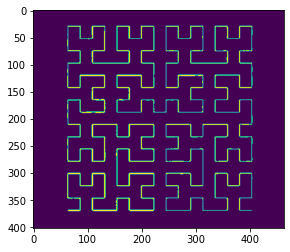

In [3]:
plt.imshow(im[:,:,0]>100)

In [42]:
thersholded = im[:,:,0]>100
from skimage.feature import corner_fast
corners = corner_fast(im[:,:,0],threshold=0.05,)
points = corners.nonzero()


In [48]:
np.array((points[1],points[0])).transpose()

array([[ 65,  29],
       [ 84,  29],
       [ 85,  29],
       ...,
       [401, 370],
       [402, 370],
       [403, 370]], dtype=int64)

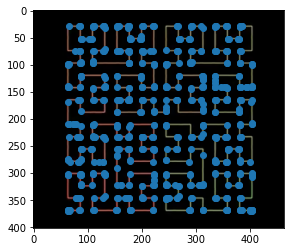

In [43]:
plt.imshow(im)
plt.scatter(points[1],points[0])

In [13]:
from skimage.morphology import skeletonize
from skimage import measure

In [21]:
def is_corner(points):
    """
    Returns True if the angle at the middle point of the input points
    is approximately 90 degrees, False otherwise.
    """
    middle_point = points[len(points)//2]
    angle_tol = np.deg2rad(20)
    angle_diff = np.abs(np.diff(np.arctan2(points[:,0]-middle_point[0], points[:,1]-middle_point[1])))[0]
    return np.abs(np.pi/2 - angle_diff) < angle_tol

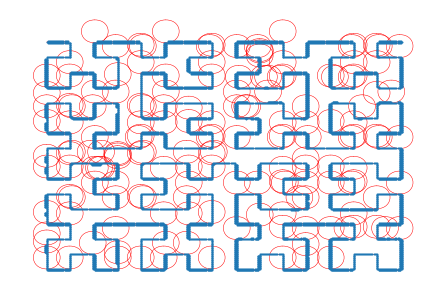

In [18]:
skeleton = skeletonize(thersholded)
edges = measure.find_contours(skeleton, 0.5)

# Initialize the graph
G = nx.Graph()

# Add the nodes to the graph
for i in range(skeleton.shape[0]):
    for j in range(skeleton.shape[1]):
        if skeleton[i, j]:
            G.add_node((i, j))

# Add the edges to the graph
for edge in edges:
    edge = np.round(edge).astype(int)
    for i in range(len(edge)-1):
        u = (edge[i][0], edge[i][1])
        v = (edge[i+1][0], edge[i+1][1])
        G.add_edge(u, v)

# Plot the graph
pos = {node: node[::-1] for node in G.nodes()}
nx.draw(G, pos=pos, with_labels=False, node_size=1, edge_color='r', width=0.5)

In [25]:
points = [(edge[0],edge[-1]) for edge in edges]
points

[(array([29.5, 85. ]), array([29.5, 85. ])),
 (array([ 29.5, 131. ]), array([ 29.5, 131. ])),
 (array([ 29.5, 175. ]), array([ 29.5, 175. ])),
 (array([ 29.5, 221. ]), array([ 29.5, 221. ])),
 (array([ 29.5, 266. ]), array([ 29.5, 266. ])),
 (array([ 29.5, 311. ]), array([ 29.5, 311. ])),
 (array([ 29.5, 356. ]), array([ 29.5, 356. ])),
 (array([ 29.5, 402. ]), array([ 29.5, 402. ])),
 (array([54.5, 64. ]), array([54.5, 64. ])),
 (array([51.5, 86. ]), array([51.5, 86. ])),
 (array([ 51.5, 109. ]), array([ 51.5, 109. ])),
 (array([ 38.5, 132. ]), array([ 38.5, 132. ])),
 (array([ 73.5, 154. ]), array([ 73.5, 154. ])),
 (array([ 30.5, 176. ]), array([ 30.5, 176. ])),
 (array([ 51.5, 199. ]), array([ 51.5, 199. ])),
 (array([ 73.5, 222. ]), array([ 73.5, 222. ])),
 (array([ 73.5, 245. ]), array([ 73.5, 245. ])),
 (array([ 50.5, 267. ]), array([ 50.5, 267. ])),
 (array([ 51.5, 290. ]), array([ 51.5, 290. ])),
 (array([ 30.5, 312. ]), array([ 30.5, 312. ])),
 (array([ 30.5, 336. ]), array([

In [53]:
from scipy.spatial import Delaunay
points_del = np.array((points[1],points[0])).transpose()
tri = Delaunay(points_del)

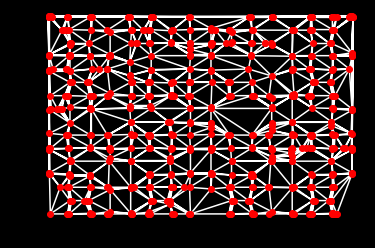

In [62]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.triplot(points_del[:,0], points_del[:,1], tri.simplices,color="white")

ax.plot(points_del[:,0], points_del[:,1], 'o',color="red")
plt.savefig("delaunay.png")
